<a href="https://colab.research.google.com/github/YashvardhanRanawat7/Spotify_EDA/blob/Yash/BA780_Team_1_(_Team_Assignment)%20Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Decoding the Secret to Popularity: A Data-Driven Exploration of Spotify Hits**


---

**Created By** : shreyassh agrawal
**

**Abstract** : *This projects aims to find out the answer to the question "What makes a song popular ?". Furthermore, the project purpose is to understand which artists and genres are performing highly based on current 'track popularity'. From this, the project will try to identify patterns that set them apart from unpopular songs. This is based of a smaller sample of the entire Spotify Ecosystem*


---







##**Table of Contents**



---



## Business Problem Definition

### Scope of Project
Spotify is the largest music streaming platform in the world. It has revolutionized music listening with various machine learning applications such as NLP and reinforcement learning. Furthermore, it has become a platform for new and upcoming artists to help them reach and engage with an audience. The scope of this project is to determine what makes a particular song popular on spotify? To do so we will explore the relationship between various audio features, genres, artists, and their respective track popularities to try and uncover what truly makes a popular track. More specifically, we’ll be focusing on the best and the worst of the tracks on Spotify to see if there are common themes among the two.


### Motivation (Why does it matter?)
Discovering what specifically makes songs popular will aid upcoming artists in song production. Given knowledge on how to construct a popular song, they will be able to grow faster on the platform. Additionally, the Spotify marketing team can employ top-funnel strategies with this information to drive more users to the app.

## Data Source: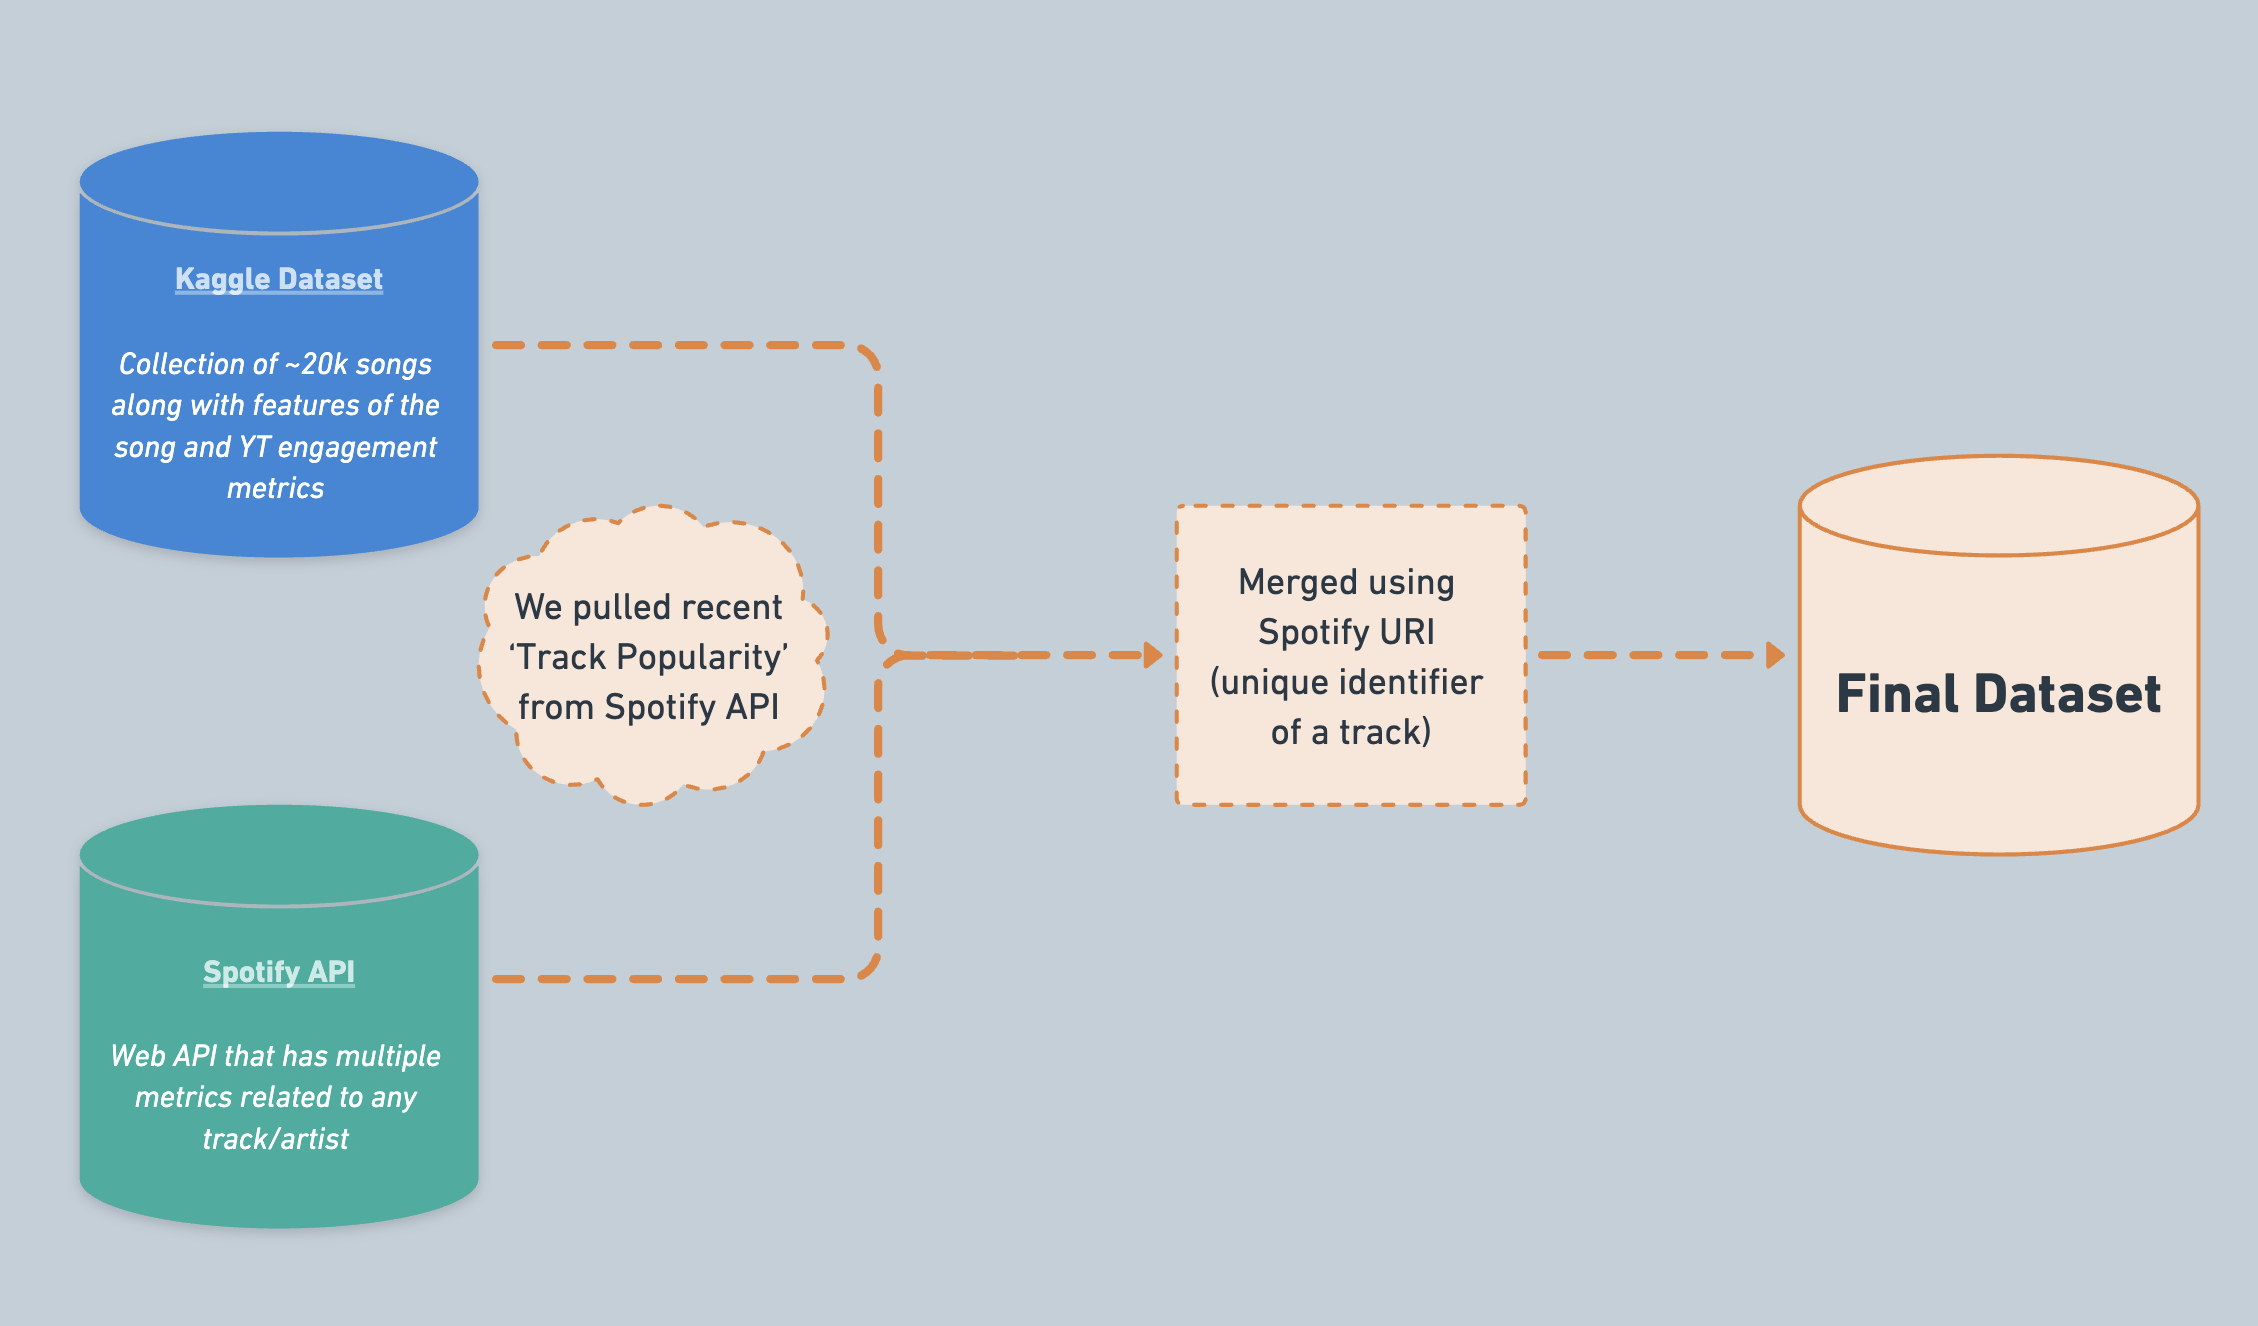

**Kaggle:** https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

**Spotify API:** https://developer.spotify.com/documentation/web-api

## API Documentation

The work to collect data from the API is a little tedious. Below is the process for gaining access, pseudocode, and a link to the two scripts that we made to collect the additional data required for our analysis.

**Gaining Access:**
- Create a Developer Account on --> https://developer.spotify.com/documentation/web-api/tutorials/getting-started
- Create an App
  - Setup Redirect URI (link that user is sent to when authorizing the app. For this use case it just needs to exist)
  - Collect ``user id`` and ``user secret``

**Pseudocode:**
- Load in dataset and convert to a ``pd.DataFrame()``
- Request an access token with ``user id`` and ``user secret`` and encode to base64
- Utilize ``spotipy`` for generating requests (library that formats json queries in correspondence with the Spotify API)
- Initialize a spotipy object ``sp`` with the active access token
- Iterate over the ``df`` in batches
  - Refresh ``sp`` with a new token if time has exceeded 1 hour
  - Create a list of ``URI`` strings, corresponding to each track in the batch
  - Use ``sp`` and the appropriate method for your query
  - Parse the json object, do the required transformations, and append to the dataset

**Link:**

https://github.com/jbblancojr/spotify/tree/main


## Data Dictionary

Column | Description | Data Type
------ | ----------- | ---------
**Artist** | The name of the artist. | ``str``
**Url_spotify** | A link to a 30 second preview (MP3 format) of the track. Can be null | ``str``
**Track** | The name of the track. | ``str``
**Album** | The name of the album. In case of an album takedown, the value may be an empty string. | ``str``
**Album_type** | The type of the album. | ``str``
**Uri** | The resource identifier of, for example, an artist, album or track. This can be entered in the search box in a Spotify Desktop Client <br /> to navigate to that resource. To find a Spotify URI, right-click (on Windows) or Ctrl-Click (on a Mac) on the artist, album or track name.  | ``str``
**Danceability** | Danceability describes how suitable a track is for dancing based on a combination of musical elements including <br /> tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. | ``float``
**Energy** | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. <br />Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, <br /> while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute <br /> include dynamic range, perceived loudness, timbre, onset rate, and general entropy. | `float`
**Key** | The key the track is in. Integers map to pitches using standard Pitch Class notation. <br /> E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. | ``int``
**Loudness** | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are <br/> useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological <br /> correlate of physical strength (amplitude). Values typically range between -60 and 0 db. | ``float``
**Speechiness** | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording <br /> (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that <br /> are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain <br /> both music and speech, either in sections or layered, including such cases as rap music. <br /> Values below 0.33 most likely represent music and other non-speech-like tracks.| `float`
**Acousticness** | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. | ``float``
**Instrumentalness** | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as <br /> instrumental in this context. Rap or spoken word tracks are clearly "vocal". <br /> The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. <br /> Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. | ``float``
**Liveness** | Detects the presence of an audience in the recording. Higher liveness values represent an increased <br /> probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. | ``float``
**Valence** | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. <br /> Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), <br /> while tracks with low valence sound more negative (e.g. sad, depressed, angry). | ``float``
**Tempo** | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, <br /> tempo is the speed or pace of a given piece and derives directly from the average beat duration. | ``float``
**Duration_ms** | The track length in milliseconds. | ``int``
**Track Popularity** | The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity <br /> is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and <br /> how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity <br /> than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) <br /> are rated independently. Artist and album popularity is derived mathematically from track popularity. | ``object``
**Genres** | A list of the genres the artist is associated with. If not yet classified, the array is empty. | ``object``
**Artist Popularity** | The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. <br /> The artist's popularity is calculated from the popularity of all the artist's tracks. | ``int``
**Available Markets** | The markets in which the album is available: ISO 3166-1 alpha-2 country codes. | ``object``
**Release Date** | The date the album was first released. | ``date (m/dd/yy)``
**Followers** | The total number of followers for an artist on spotify. | ``int``
**Url_youtube** | Youtube video url link. | ``str``
**Title** | Youtube video title. | ``str``
**Channel** | Channel username. | ``str``
**Views** | Count of views on a youtube video. | ``int``
**Likes** | Count of likes on a youtube video. | ``int``
**Comments** | Count of comments on a youtube video. | ``int``
**Description** | Youtube Video description. | ``str``
**Licensed** | Video has a UMG license to enforce copyright claims. | ``bool``
**official_video** | Video posted from artist account. | ``bool``
**Stream** | Number of stream on spotify ( Part of Kaggle data ) | ``int``

## Getting Started

### Loading Libraries and Files


In [ ]:
import pandas as pd
import missingno as msno
from datetime import datetime as dt
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import plotly.express as px


#For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import silhouette_score

!pip install pycountry -q
import pycountry

sns.set_palette('viridis')

In [ ]:
dataframe = pd.read_csv("/content/Spotify_Youtube_wAPI_Final.csv")

### Understanding The Dataset

Lets take a brief look at the top of the dataset, as well as some basic info, descriptive stats, datatypes, and variable distributions to get a rough understanding of the data we're working with.

In [ ]:
dataframe.head()

,Unnamed: 0.1,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,...,Description,Licensed,official_video,Stream,Artist Popularity,Track Popularity,Genres,Available Markets,Release Date,Followers
0,0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,...,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,78,84,"['alternative hip hop', 'modern rock', 'rock']","['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",2005-05-23,10891104
1,1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,...,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,78,78,"['alternative hip hop', 'modern rock', 'rock']","['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",2010-03-03,10891104
2,2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,78,67,"['alternative hip hop', 'modern rock', 'rock']","['AR', 'AU', 'AT', 'BO', 'BR', 'BG', 'CA', 'CL...",2022-08-31,10891104
3,3,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,78,67,"['alternative hip hop', 'modern rock', 'rock']","['AR', 'AU', 'AT', 'BO', 'BR', 'BG', 'CA', 'CL...",2022-08-31,10891104
4,4,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,78,67,"['alternative hip hop', 'modern rock', 'rock']","['AR', 'AU', 'AT', 'BO', 'BR', 'BG', 'CA', 'CL...",2022-08-31,10891104


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26404 entries, 0 to 26403
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       26404 non-null  int64  
 1   Unnamed: 0         26404 non-null  int64  
 2   Artist             26404 non-null  object 
 3   Url_spotify        26404 non-null  object 
 4   Track              26404 non-null  object 
 5   Album              26404 non-null  object 
 6   Album_type         26404 non-null  object 
 7   Uri                26404 non-null  object 
 8   Danceability       26402 non-null  float64
 9   Energy             26402 non-null  float64
 10  Key                26402 non-null  float64
 11  Loudness           26402 non-null  float64
 12  Speechiness        26402 non-null  float64
 13  Acousticness       26402 non-null  float64
 14  Instrumentalness   26402 non-null  float64
 15  Liveness           26402 non-null  float64
 16  Valence            264

Looking at ``dtypes()``, it would seem that a lot of our data from the Spotify API is still in ``object`` format. We'll need to adjust the variables we want to visualize.

In [ ]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,26404.0,1.320150e+04,7.622323e+03,0.000000,6.600750e+03,1.320150e+04,1.980225e+04,2.640300e+04
Unnamed: 0,26404.0,1.049402e+04,6.087598e+03,0.000000,5.101750e+03,1.073200e+04,1.582125e+04,2.071700e+04
Danceability,26402.0,6.152273e-01,1.701334e-01,0.000000,5.160000e-01,6.340000e-01,7.390000e-01,9.750000e-01
Energy,26402.0,6.394082e-01,2.080074e-01,0.000020,5.260000e-01,6.680000e-01,7.930000e-01,1.000000e+00
Key,26402.0,5.259223e+00,3.585773e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,26402.0,-7.581390e+00,4.551974e+00,-46.251000,-8.537000e+00,-6.548000e+00,-4.930000e+00,9.200000e-01
Speechiness,26402.0,9.747285e-02,1.082482e-01,0.000000,3.680000e-02,5.190000e-02,1.100000e-01,9.640000e-01
Acousticness,26402.0,2.969037e-01,2.809710e-01,0.000001,5.410000e-02,2.065000e-01,4.820000e-01,9.960000e-01
Instrumentalness,26402.0,5.238942e-02,1.888176e-01,0.000000,0.000000e+00,1.350000e-06,2.700000e-04,1.000000e+00
Liveness,26402.0,1.944699e-01,1.706514e-01,0.014500,9.490000e-02,1.260000e-01,2.270000e-01,1.000000e+00


Looking at the ``describe()`` output, it seems that we have some good variance in our data.



Since our concerns are mostly related to the Spotify columns, lets take a look at the histograms of our audio features, just to get an idea of how our data is distributed overall.

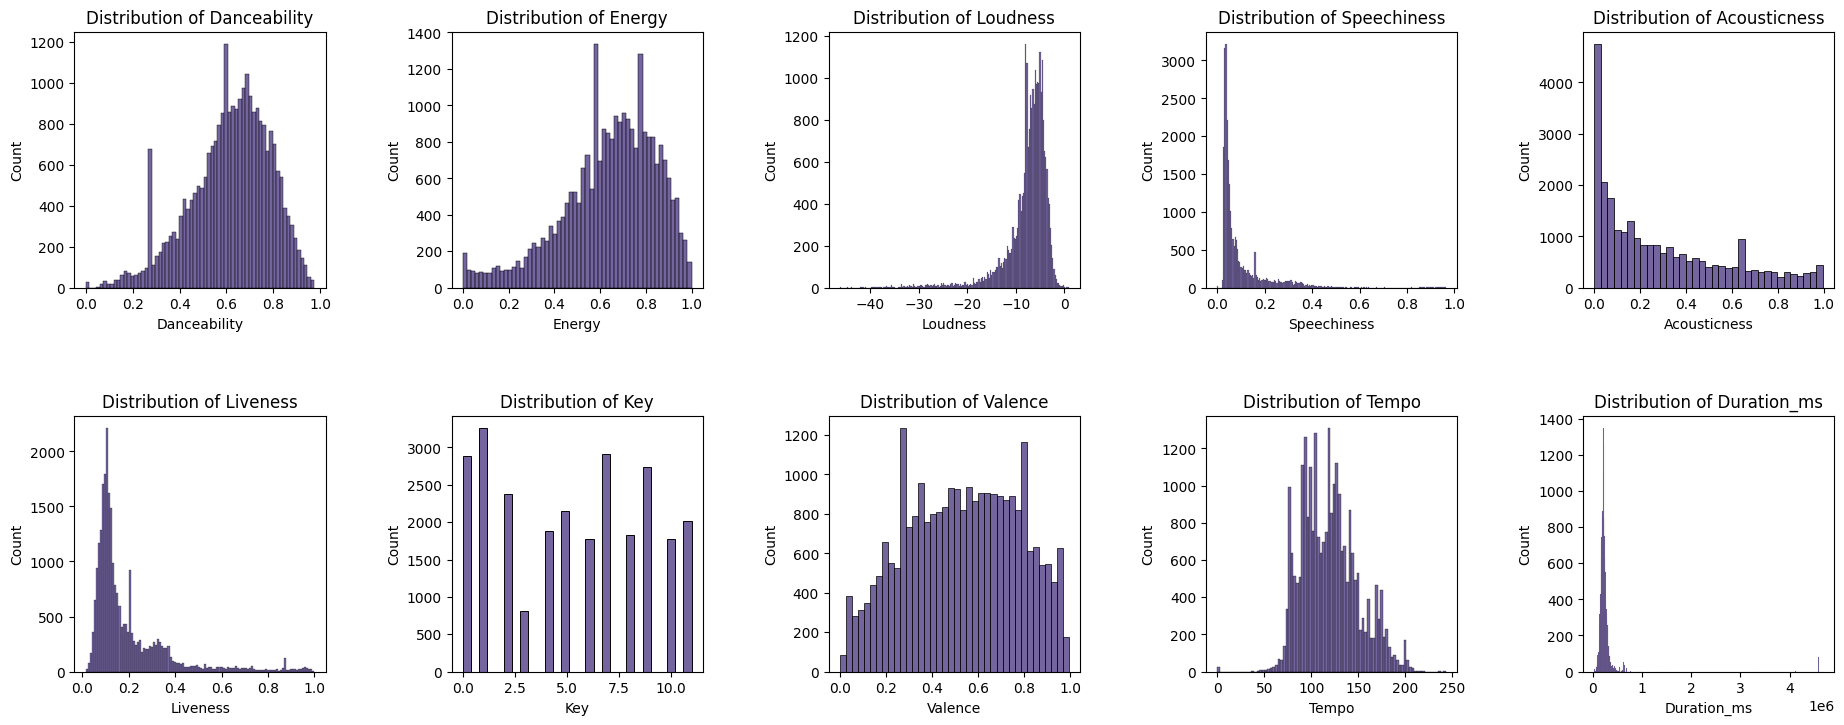

In [ ]:
# Overall Figure (3x6 with 18 subplots). Flattening the axes will help seaborn do backend stuff faster.
fig, axes = plt.subplots(2, 5, figsize=(22, 8))
axes = axes.flatten()

# For each of our numerical columns, histogram plot it and add it to the appropriate slot in the overall fig
# Enumerate because we need an iterator and the column
for i, column in enumerate(['Danceability', 'Energy', 'Loudness', 'Speechiness',
                            'Acousticness', 'Liveness', 'Key',
                            'Valence', 'Tempo', 'Duration_ms']):
    sns.histplot(data=dataframe, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.subplots_adjust(left= .1, right= .9, bottom= .1, top=.9, wspace=.5, hspace=.5)
plt.show()

For the most part, it seems like our audio features are normally distributed. Let's now get a look at ``Track Popularity`` up close, as it is our variable of interest.

#### Normalizing Track Popularity

We want to make sure that when we are exploring track popularity (especially top and bottom 10), that our data is normally distributed and we can create appropriate buckets. The KDE chart and box plot will give us a good idea of how track popularity is distributed among the dataset. This way we can better identify true top and bottom genres, artists, etc.

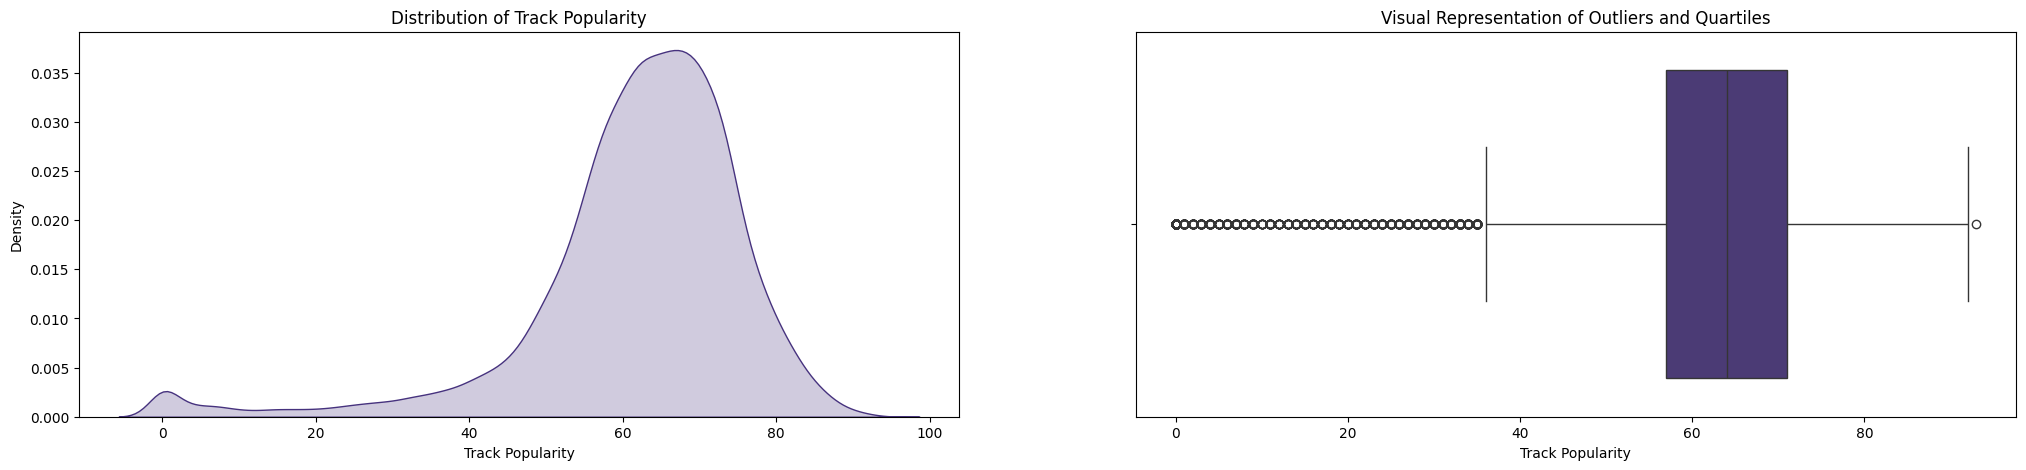

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

#KDE plot
data = dataframe['Track Popularity']
sns.kdeplot(data, ax=axes[0], fill=True)
sns.boxplot(data, ax=axes[1], orient='h')
axes[0].set_title('Distribution of Track Popularity')
axes[1].set_title('Visual Representation of Outliers and Quartiles')

plt.show()

Interestingly and to no surprise, there is a left skew in ``Track Popularity`` and the peak falls within the range of 55-70. This is likely due to the fact that there are many users on Spotify who will create artists profiles and tracks that aren’t professional or verified artists, and thus scoring really low on track popularity. Given that the dataset is about a year old, we can conclude that there wouldn’t be any just added tracks that would cause the skew and its likely attributed to the group of users previously mentioned.

For our analysis it will be best to just remove these outliers, as they just make the dataset noisy.

In [ ]:
IQR = np.quantile(dataframe['Track Popularity'], .75) - np.quantile(dataframe['Track Popularity'], .25)
upper = np.quantile(dataframe['Track Popularity'], .75) + IQR * 1.5
lower = np.quantile(dataframe['Track Popularity'], .25) - IQR * 1.5

dataframe = dataframe[(dataframe['Track Popularity'] > lower) & (dataframe['Track Popularity'] < upper)]

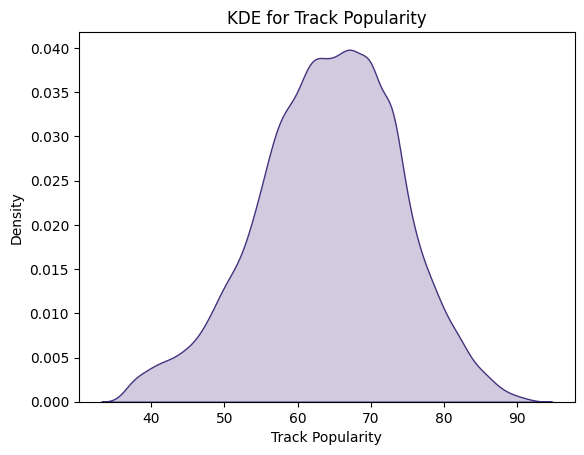

In [ ]:
data = dataframe['Track Popularity']
sns.kdeplot(data, fill=True)

plt.xlabel('Track Popularity')
plt.ylabel('Density')
plt.title('KDE for Track Popularity')

plt.show()

## Data Cleaning and Transformation

Before we begin cleaning the data, we need to take a look at what is missing so we know where to focus our cleaning efforts and impute missing values.

<Axes: >

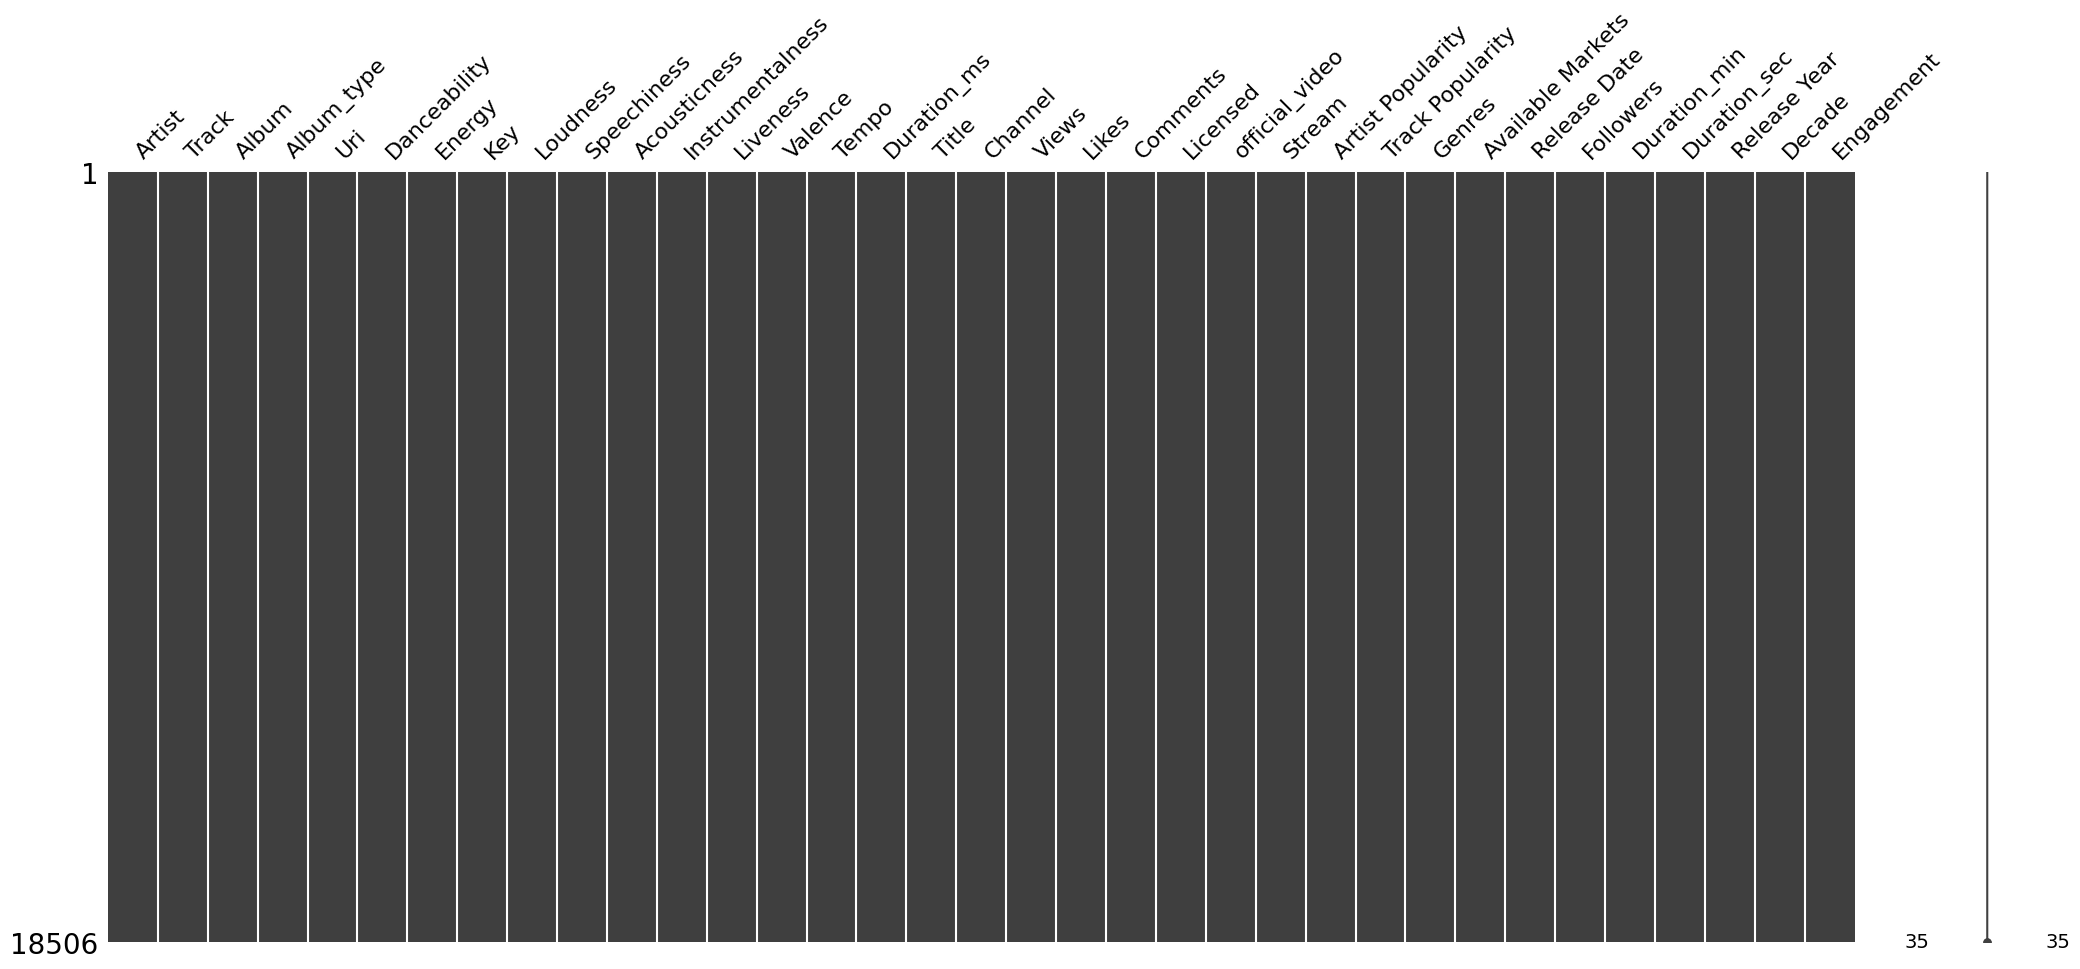

In [ ]:
#Visualizing Null Values using missingno library
msno.matrix(dataframe)

We can see here that the missing values are mainly centered around the youtube data. Spotify data seems to be completely intact (outside of two instances of our audio features which are too small to see in the matrix). Let's go ahead and drop duplicate values and unwanted columns

### Droping Duplicates

In [ ]:
duplicates = dataframe.duplicated(subset=['Artist','Track','Uri'])
dataframe = dataframe[~duplicates]
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18506 entries, 0 to 20716
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Artist             18506 non-null  object 
 1   Track              18506 non-null  object 
 2   Album              18506 non-null  object 
 3   Album_type         18506 non-null  object 
 4   Uri                18506 non-null  object 
 5   Danceability       18506 non-null  float64
 6   Energy             18506 non-null  float64
 7   Key                18506 non-null  object 
 8   Loudness           18506 non-null  float64
 9   Speechiness        18506 non-null  float64
 10  Acousticness       18506 non-null  float64
 11  Instrumentalness   18506 non-null  float64
 12  Liveness           18506 non-null  float64
 13  Valence            18506 non-null  float64
 14  Tempo              18506 non-null  float64
 15  Duration_ms        18506 non-null  float64
 16  Title              18506 no

### Dropping Unnecessary Columns

There are a few columns that we won't need for our analysis, some of which have missing values. It makes the most sense to drop them here before proceeding.

In [ ]:
print(dataframe.columns)

Index(['Artist', 'Track', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Licensed',
       'official_video', 'Stream', 'Artist Popularity', 'Track Popularity',
       'Genres', 'Available Markets', 'Release Date', 'Followers',
       'Duration_min', 'Duration_sec', 'Release Year', 'Decade', 'Engagement'],
      dtype='object')


In [ ]:
#Dropping Unnamed: 0.1 column as we already have a column which represents index
dataframe.drop(columns=['Unnamed: 0.1'], inplace=True)

#Setting Unnamed: 0 column as our index
dataframe.set_index('Unnamed: 0',inplace=True)
dataframe= dataframe.rename_axis('')

# As URL and description of the music video isn't helpful for our analysis , We will be dropping these columns
dataframe.drop(columns= ['Url_spotify','Url_youtube','Description'], inplace=True)

KeyError: "['Unnamed: 0.1'] not found in axis"

### Dropping Values Under Threshold

When we looked at the missingno matrix, we saw that the missing values are pretty sparse. If we follow a 5% rule, we can clear up essentially all of our missing data problems.

In [ ]:
# Our 5% threshold. If any column is missing more than this we can't apply this rule.
threshold = len(dataframe) * .05

# Get the amount of missing values from each column
print(f'Threshold: {threshold} \n\nMissing per Column: \n{dataframe.isna().sum()}')

In [ ]:
cols_to_drop = dataframe.columns[dataframe.isna().sum() <= threshold]

dataframe.dropna(subset=cols_to_drop, inplace=True)

# There are also

dataframe.info()

### Feature Engineering

Some variables will require some manipulations for our analysis.

- We'll need to change the ``duration_ms`` from milliseconds to minutes and seconds so it translates better in visualizations.

- It will also be useful to generate a decade variable from ``Release Year`` given that music is more defined by the decade it comes from, rather the year. Note that some tracks have a release date of 0000, which we won't be able to utilize for our analysis, so we will need to remove them.

- We should make a unified performance metric for a track on Youtube. We can call this engagement.

- ``Key`` is in number form right now, but it actually represents music notes. We can remap the numbers to the letters.

#### Duration by Minutes and Seconds

In [ ]:
dataframe['Duration_min']=dataframe['Duration_ms']/60000
dataframe['Duration_sec']=dataframe['Duration_ms']/1000

#### Decade

In [ ]:
# Release Date
dataframe['Release Date'] = dataframe['Release Date'].astype(str)

# All variables are formatted as %Y-%m-%d, but some only have %Y
# Since we only want to utilize the year anyways, it is okay to generalize
dataframe['Release Year'] = dataframe['Release Date'].str[:4]
dataframe[dataframe['Release Year'].str.contains('000', case=False)]

# 35 instances of movie soundtrack songs with 0000 for release date value
# They don't have genre either so they're not contributing to the analysis
dataframe = dataframe[dataframe['Release Year'] != 0000]
dataframe['Release Year'] = dataframe['Release Year'].convert_dtypes()

# Decade Column
dataframe['Decade'] = dataframe['Release Year'].apply(lambda year: str(int(year) // 10 * 10) + 's')

#### Engagement

In [ ]:
dataframe['Engagement'] = dataframe['Likes'].astype(int) + dataframe['Views'].astype(int) + dataframe['Comments'].astype(int)

#### Key

In [ ]:
keylist = {0: 'C', 1: 'C♯', 2: 'D', 3: 'E♭',
           4: 'E', 5: 'F', 6: 'F♯', 7: 'G',
           8: 'G♯', 9: 'A', 10: 'F♯', 11: 'B'}

dataframe['Key'] = dataframe['Key'].map(keylist)

#### Manipulations for Specific Visualizations

To create visualizations for ``Artist`` and ``Genres``, we'll have to rearange the datasets to have the variables be indexes for their respective visualizations.

One last thing to note is that we need to generate a ``count`` and ``weight`` column so that our data doesn't skew to instances of an artist or genre with only one song that was extremely popular or unpopular.

**Genres**

In [ ]:
# subset
genre = dataframe[['Genres', 'Danceability', 'Energy', 'Valence', 'Decade', 'Engagement', 'Key',
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Track Popularity', 'Duration_min', 'Artist']]

# Stored as object --> change to string and strip.
# use apply here so we don't raise an error for trying to do this to a pd.Series
genre['Genres'] = genre['Genres'].apply(lambda x: x.strip('[]').split(', '))


# Explode will expand the list and apply each element to the same columns for len(list)
genre = genre.explode(column='Genres')
genre['Genres'] = genre['Genres'].str.strip("'")

# Add counts and weight for visualizations
gc = genre['Genres'].value_counts().reset_index()
gc['index'] = gc['index'].convert_dtypes()

genre = pd.merge(genre, gc, left_on='Genres', right_on='index', how='left')
genre.rename(columns={'Genres_y': 'count', 'Genres_x': 'Genres' }, inplace=True)

genre['weight'] = genre['count'] * .4 + genre['Track Popularity'] * .6
genre['weight_normalized'] = ((genre['weight'] - genre['weight'].min()) / (genre['weight'].max() - genre['weight'].min())) * 100

# Some genres don't really have enough information for us to include them and make assumptions about
genre['count'] = genre['count'].astype(int)
genre = genre[genre['count'] > 10]

When transforming the dataset, we'll find that some tracks are placed in ``Genres = []``. This is due to the fact that ``Genres`` represents a list of genres that correspond to an ``Artist``. Unfortunately this is just a limitation of the API.

Furthermore, the likely reason for an empty JSON object is likely due to the fact that tracks often have featured artist along with the true artist. Our logical guess is that if these two artists do not have any overlap in ``Genres``, the result is ``[]``.

In [ ]:
len(genre[genre['Genres'] == ''])

205

In [ ]:
genre = genre[genre['Genres'] != '']

Since 205 is a negligible amount, it's okay to just remove them here, as they won't contribute or hinder the analysis whatsoever.

**Artists**

In [ ]:
# subset
artist = dataframe[['Artist', 'Danceability', 'Energy', 'Valence', 'Decade', 'Engagement', 'Key',
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Track Popularity', 'Duration_min', 'Genres']]

# Add counts and weight for visualizations
ac = artist['Artist'].value_counts().reset_index()
artist = pd.merge(artist, ac, left_on='Artist', right_on='index', how='left')
artist.rename(columns={'Artist_y': 'count', 'Artist_x': 'Artist'}, inplace=True)

artist['weight'] = artist['count'] * .4 + artist['Track Popularity'] * .6
artist['weight_normalized'] = ((artist['weight'] - artist['weight'].min()) / (artist['weight'].max() - artist['weight'].min())) * 100
artist = artist[artist['Genres'] != '[]']

KeyError: 'index'

## Summarization & Trends over Time

Now that our data is tidied up a bit more, we can start asking basic questions about the data before we dig deeper on the drivers of ``Track Popularity``.

### What Music Defines each Decade?


Even without a dataset to observe, most can agree that music changes over time in terms of sound, style, and artists or genres. Let's take a closer look at these trends.

First let's look at what people were listening to the most.

In [ ]:
# Genres over the Decades
counts = genre[['Decade', 'Genres']].groupby(by=['Decade', 'Genres']).value_counts().reset_index(name='count')
counts.groupby(by='Decade').apply(lambda x: x.nlargest(1, 'count'))

<ipython-input-57-85933000eef8>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts.groupby(by='Decade').apply(lambda x: x.nlargest(1, 'count'))


,,Decade,Genres,count
Decade,,,,
1930s,0,1930s,adult standards,1
1940s,8,1940s,adult standards,3
1950s,50,1950s,vocal jazz,30
1960s,136,1960s,rock,102
1970s,199,1970s,classic rock,335
1980s,559,1980s,rock,336
1990s,976,1990s,rock,289
2000s,1249,2000s,dance pop,323
2010s,2375,2010s,pop,909


From the table it would appear that rock and pop have stood the test of time in terms of their reach. Furthermore, it looks like our data for older music might not be perfectly accurate, as we only have 4 instances of ``count`` for the 1930s and 1940s

Let's look at how sound and audio features have evolved over time.

In [ ]:
features = ['Danceability', 'Energy', 'Instrumentalness', 'Speechiness', 'Acousticness', 'Liveness']
plot_data = dataframe.groupby('Decade')[features].mean().reset_index()

fig = px.line(data_frame=plot_data, x='Decade', y=features, markers=True)

fig.update_layout(title='Average Audio Feature Emphasis by Decade', legend_title_text='Feature')
fig.update_yaxes(title_text='Feature Emphasis')

Looking at the feature chart, we can see that ``Acousticness`` has decreased substaintially and ``Energy`` has increased. The other features have not differed that much. The decrease in ``Acoustincness`` makes sense as new instruments have been created over time, meaning artists were beginning to have an ability to choose a non-acoustic instrument. Furthermore this would also suggest a negative correlation between ``Energy`` and ``Acousticness``.

In [ ]:
plot_data = dataframe.groupby('Decade').agg({'Duration_min': 'mean'}).reset_index()

px.line(data_frame=plot_data, x='Decade', y='Duration_min', markers=True, title='Average Track Duration by Decade')

The ``Duration`` chart is also interesting. The peak in the 1980s and 1990s makes a lot of sense, given that this was the height of classic rock jam bands, which we found in the table earlier. This genre tends to be lengthier in duration as it adopted frameworks inspired by free-form jazz, where the band would repeat over verses and allow each instrument to improvise.

The more recent decline makes sense. Music is extremely commercialized and standardized now for things such as the radio and TikTok, which are built around the idea of shorter products.

In [ ]:
keys = dataframe.groupby(by=['Key', 'Decade']).size().reset_index().sort_values('Decade')

px.line(data_frame=keys, x='Decade', y=0, color='Key', symbol='Key')

The frequency of ``Keys`` over ``Decade`` is interesting as well. We see that generally, the most common keys of C, G, and D perform consistently higher than others. This should be expected as these keys are easier to write in and easier for people to perform in. What is interesting is the dominance of F#. This is a very uncommon key. F# has the most black notes in its scale, making it very difficult to play in, and it generally is not common. The only explanation is that Spotify tries to determine the key on its own, rather than recieving information on the track's key when an artist uploads.

### What's Popular Now?


Now that we have a general idea of how music has changed over time, lets find out what it popular (and unpopular) currently. Since ``Track Popularity`` is a live metric, we can use it as a measure for the top ``Genres`` and ``Artists``.

In [ ]:
genres_grouped = genre.groupby(by='Genres').agg({'Track Popularity': 'mean', 'count': 'mean', 'weight': 'mean', 'weight_normalized': 'mean'}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.barplot(x = 'Genres', y = 'weight_normalized', data = genres_grouped.sort_values(by = 'weight_normalized', ascending = False).head(10), ax=axes[0])
sns.barplot(x = 'Genres', y = 'weight_normalized', data = genres_grouped.sort_values(by = 'weight_normalized', ascending = True).head(10), ax=axes[1])

axes[0].set_title('Top 10 Genres')
axes[1].set_title('Bottom 10 Genres')
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)

axes[0].set_ylabel('Average Track Popularity')
axes[1].set_ylabel('Average Track Popularity')
plt.show()

KeyError: "Column(s) ['count', 'weight', 'weight_normalized'] do not exist"

To no surprise, some of the most popular genres are pop, rock, and rap. This is what you would expect to find given that pop is short for popular. Furthermore, these genres are typically considered to have the most reach in industry so it makes sense to see them at the top here.

In [ ]:
artists_grouped = artist.groupby(by='Artist').agg({'Track Popularity': 'mean', 'count': 'mean', 'weight': 'mean', 'weight_normalized': 'mean'}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.barplot(x = 'Artist', y = 'weight_normalized', data = artists_grouped.sort_values(by = 'weight_normalized', ascending = False).head(10), ax=axes[0])
sns.barplot(x = 'Artist', y = 'weight_normalized', data = artists_grouped.sort_values(by = 'weight_normalized', ascending = True).head(10), ax=axes[1])

axes[0].set_title('Top 10 Artists')
axes[1].set_title('Bottom 10 Artists')
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)

axes[0].set_ylabel('Average Track Popularity')
axes[1].set_ylabel('Average Track Popularity')
plt.show()

KeyError: "Column(s) ['count', 'weight', 'weight_normalized'] do not exist"

In [ ]:
artists = ['The Weeknd', 'Coldplay', 'Bad Bunny', 'Olivia Rodrigo', 'Eminem', 'Taylor Swift', 'Bruno Mars', 'Billie Eilish',
           'L.V.', 'Rolf Zuckowski', 'Thomas Karallus', 'Freshlyground', 'Playero', 'Die drei !!!', 'Mikky Ekko', 'Benjamin Blümchen', 'RZA', 'Dwele']

genre[genre['Artist'].isin(artists)][['Artist', 'Genres']].drop_duplicates()

,Artist,Genres
,,
40,Coldplay,permanent wave
40,Coldplay,pop
43,Coldplay,electropop
120,Eminem,detroit hip hop
120,Eminem,hip hop
120,Eminem,rap
1987,Benjamin Blümchen,hoerspiel
4912,Dwele,neo soul
5384,Playero,reggaeton


By glancing, we can see that the most popular artists are actually creating tracks in the most popular genres as of right now. The same can be said for a few of the most unpopular artists as well.

### Where Isn't Spotify Available?

If we look at the ``Available Markets`` unique values and a distribution, we'll find that most often, artists are pushing their song to as many markets as possible. This would suggest there really isn't any strategy in terms of where artists place their songs and that Spotify probably figures out where to push them on the backend.

However, instead of looking at target markets, we can take an opposite approach to the data and see where songs are unavailable. Moreover, which countries is Spotify not available? Is the app prohibited altogether?

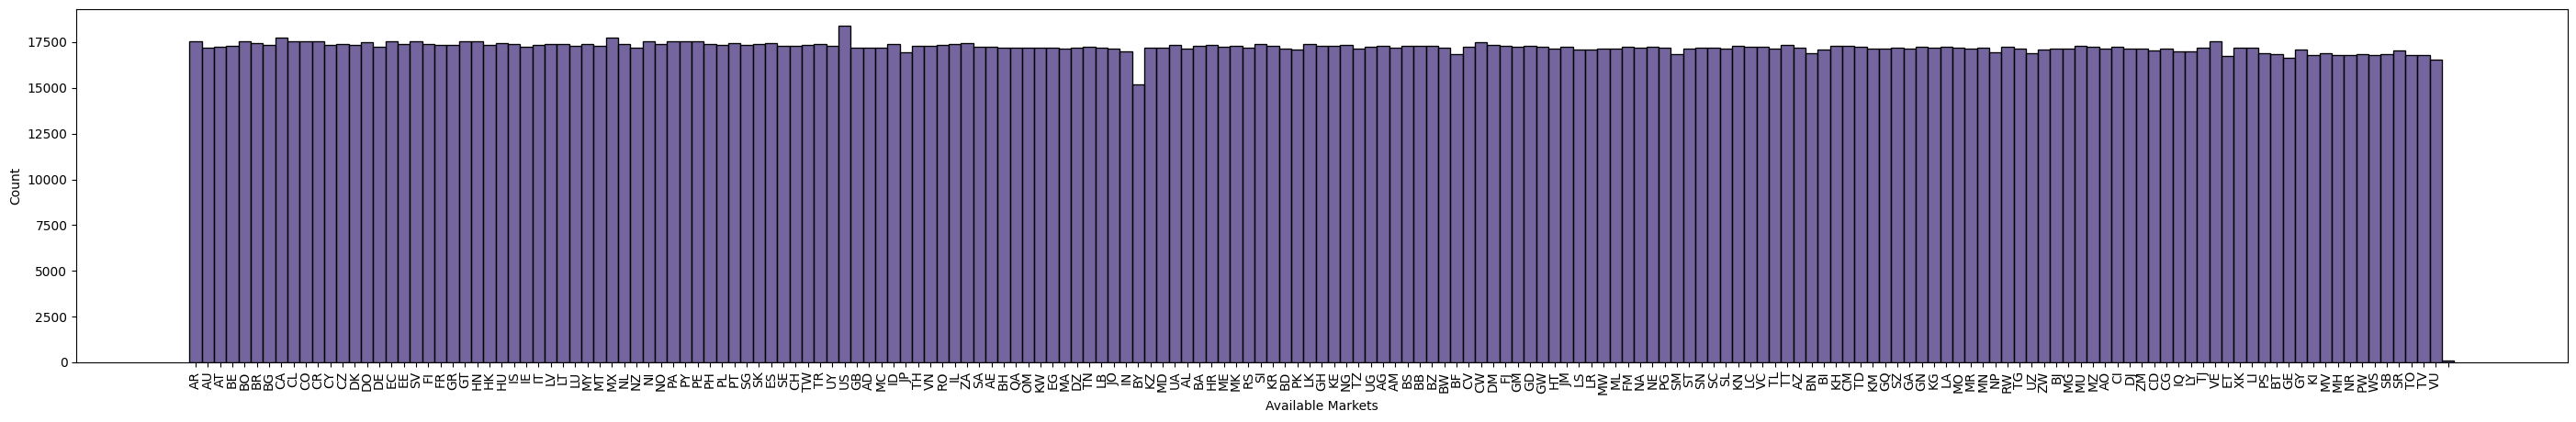

In [ ]:
len(dataframe['Available Markets'].unique())

# Stored as object --> change to string and strip.
# use apply here so we don't raise an error for trying to do this to a pd.Series
markets = dataframe['Available Markets'].apply(lambda x: x.strip('[]').split(', ')).reset_index()

# Explode will expand the list and apply each element to the same columns for len(list)
markets = markets.explode(column='Available Markets')
markets['Available Markets'] = markets['Available Markets'].str.strip("'")
markets['Available Markets'] = markets['Available Markets'].astype(str)

markets[markets['Available Markets'] != '']

fig, ax = plt.subplots(figsize=(35, 5))

sns.histplot(data=markets, x='Available Markets')
ax.tick_params(axis='x', labelrotation=90)


In [ ]:
# pycountry takes an ISO and returns a pycountry.country class, where you can access the name field
markets['Country'] = markets['Available Markets'].apply(lambda x: pycountry.countries.get(alpha_2=str(x)).name if pycountry.countries.get(alpha_2=x) else None) # replace the '' with None

temp_count = markets['Country'].value_counts().reset_index()
temp_count.rename(columns={'Country': 'Count'}, inplace=True)

markets = markets.merge(temp_count, left_on='Country', right_on='index')
markets['Country'] = markets['Country'].astype('string')
markets = markets.drop_duplicates(subset='Country')
markets = markets[['Available Markets', 'Country', 'Count']]

KeyError: 'index'

In [ ]:
markets.info()

In [ ]:
# Create basic choropleth map
px.choropleth(markets, locations='Country', color='Count', hover_name='Count', locationmode = "country names",
                    scope = 'world', projection='natural earth',
                    title='Spotify Locations')

Looking at the choropleth chart, we get a visual representation of the amount of songs in each country, with the gray countries representing the unavailable markets. The color scheme is a little misleading as for the most part there isn't much of a difference in song availability across each country, but it does a great job of visualizing where they are not available. Interstingly, if you look at Spotify's available markets (https://support.spotify.com/us/article/where-spotify-is-available/), you can see that the list matches the map for the most part from an availability perspective.

The discrepancies would be a result of the dataset being about a year old.

## Exploratory Data Analysis (EDA)

To get started, we need to first figure out: What is ``Track Popularity`` and what drives it? From here we can start to drill down further by things such as artist and genre.

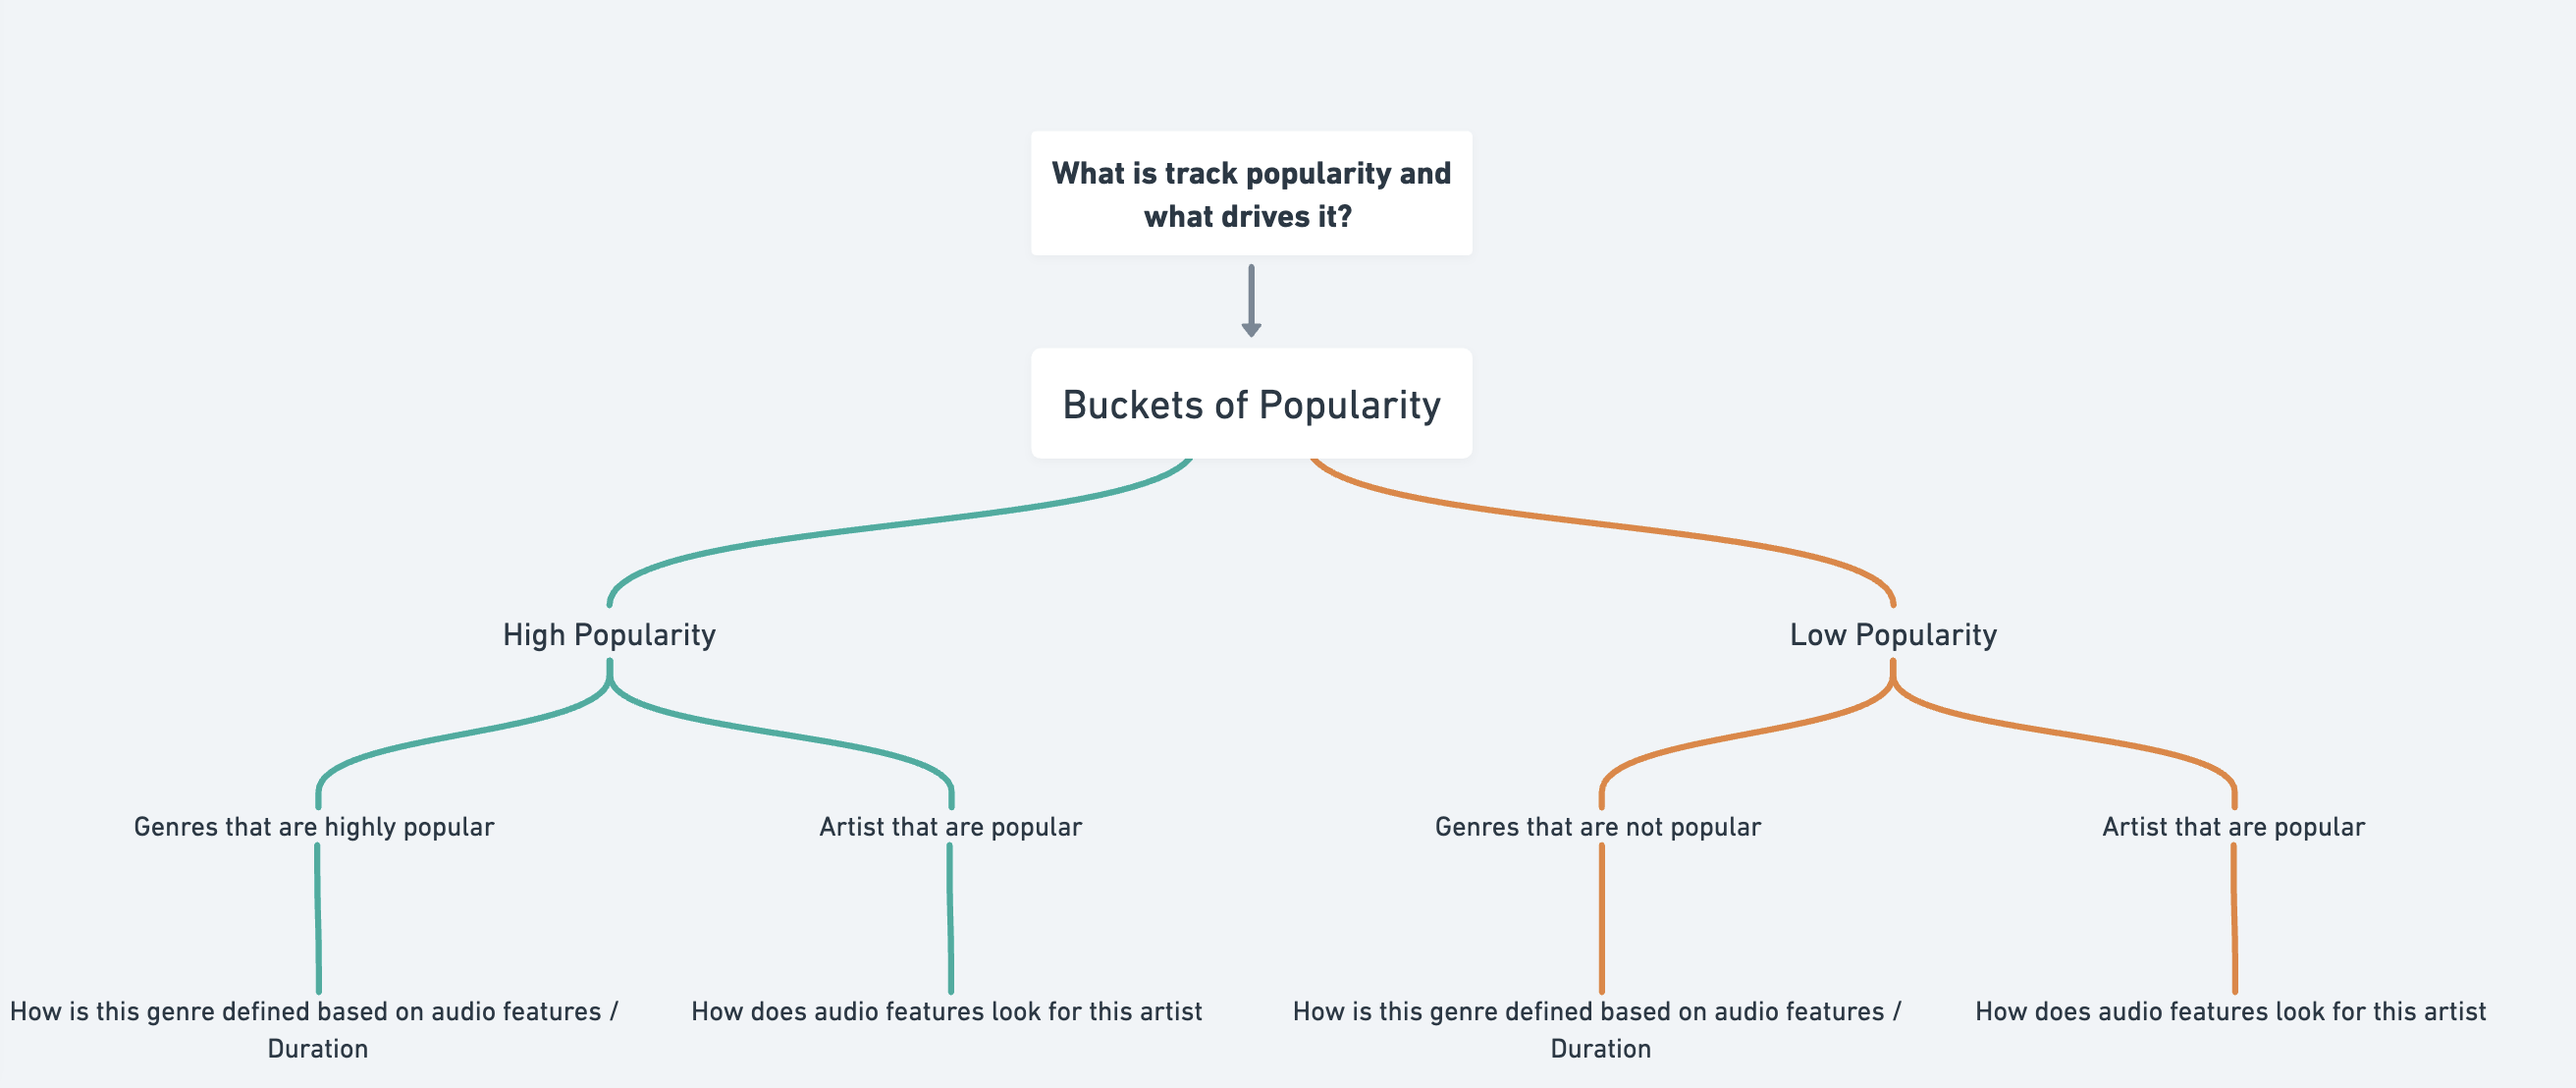

### Identifying Drivers of Track Popularity

#### Do Certain Audio Features Lead to an Increase in Track Popularity?

The first obvious relationship that is worth exploring is track features and how they are related to track popularity. With this we can rank features by importance and suggest.

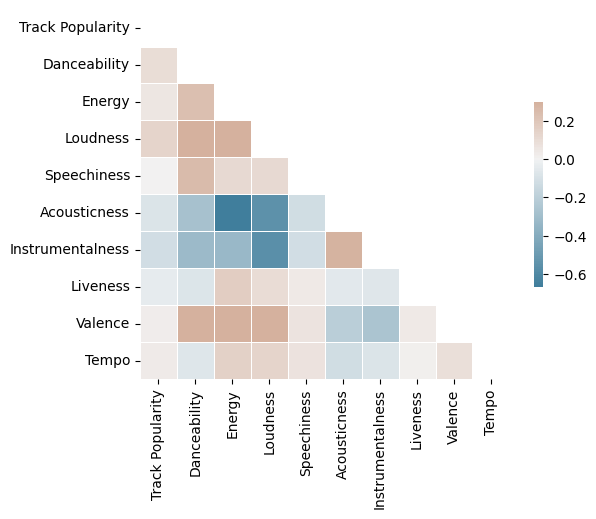

In [ ]:
# Correlation Matrix

# Subset the df
audio_features = dataframe[['Track Popularity', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

# Instantiate chart variables (utilizing seaborn documentation for feature custimization)
corr = audio_features.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots()
cmap = sns.diverging_palette(230, 30, as_cmap=True)

popularity_matrix = sns.heatmap(corr, mask=mask, cmap=cmap,
                                vmax=.3, center=0, square=True,
                                linewidths=.5, cbar_kws={'shrink': .5}
                                )

Surprisingly, none of the features are really correlated with track popularity. If you think about it a little harder it does start to make sense. Songs, genres, and artists are all unique because of how these features are clustered together.

#### Does an Artist's Engagement on Youtube Lead to an Increase in Track Popularity?

Since there are an abundance of artists in the dataset, it doesn’t really make sense to try a correlation matrix between artists and track popularity. Additionally, we can’t compare artist popularity to track as it is a function of track popularity.

We'll substitute engagement of the track on youtube as the artist since it is numerical.

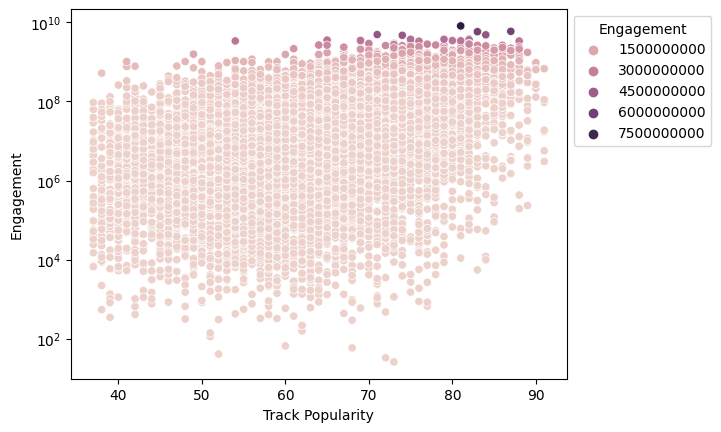

In [ ]:
x=sns.scatterplot(data=dataframe, y=dataframe['Engagement'], x=dataframe['Track Popularity'], hue=dataframe['Engagement'])
sns.move_legend(x, "upper left", bbox_to_anchor=(1, 1))
x.set_yscale("log")

Again, we're not really seeing any correlation with the artist and track popularity. This too is suprising and will require us to dig a little deeper into the data.

### Identifying Top / Bottom Artists and Genres

Since it's difficult to find a relationship between ``Track Popularity`` and individual variables, it might be better to look at some of the best and worst Artists / Genres and see what about them makes their tracks popular.

To do this, lets recall our top and bottom ``Artist`` and ``Genres`` in terms of ``Track Popularity``

In [ ]:
pd.concat([artists_grouped.sort_values(by = 'weight_normalized', ascending = False).head(5), artists_grouped.sort_values(by = 'weight_normalized', ascending = True).head(5)], axis=0)

,Artist,Track Popularity,count,weight,weight_normalized
1808,The Weeknd,87.875000,8.0,55.925,92.569444
369,Coldplay,85.200000,10.0,55.120,90.333333
156,Bad Bunny,84.600000,10.0,54.760,89.333333
1233,Metro Boomin,84.400000,10.0,54.640,89.000000
1374,Olivia Rodrigo,84.300000,10.0,54.580,88.833333
1545,Rolf Zuckowski,37.000000,1.0,22.600,0.000000
614,Freshlyground,38.000000,3.0,24.000,3.888889
1450,Playero,39.333333,3.0,24.800,6.111111
459,Die drei !!!,37.500000,6.0,24.900,6.388889
1247,Mikky Ekko,41.333333,3.0,26.000,9.444444


In [ ]:
pd.concat([genres_grouped.sort_values(by = 'weight_normalized', ascending = False).head(5), genres_grouped.sort_values(by = 'weight_normalized', ascending = True).head(5)], axis=0)

,Genres,Track Popularity,count,weight,weight_normalized
453,pop,69.633149,1810.0,765.779890,98.302871
524,rock,65.888889,1620.0,687.533333,87.944577
502,rap,67.907506,1319.0,568.344503,72.166336
161,dance pop,64.516032,998.0,437.909619,54.899341
274,hip hop,66.069593,934.0,413.241756,51.633804
276,hoerspiel,42.727273,11.0,30.036364,0.904999
306,italian opera,47.727273,11.0,33.036364,1.302140
308,italian romanticism,47.727273,11.0,33.036364,1.302140
45,axe,48.000000,12.0,33.600000,1.376754
3,a cappella,49.545455,11.0,34.127273,1.446555


### Is There a Song Architype that Leads to Higher Track Popularity?

#### Radar Chart Building

Since there is a lot of repetition here, a function will be helpful to keep the code clean.

In [ ]:
# Arguments:
#   a manipulated dataframe ready for charting (df: pd.DataFrame),
#   an argument for returning the top ten or bottom ten of a category (bottom: bool),
#   a column name for a category (category: str),
#   an argument for returning top 5 bottom 5 side by side(mix: bool)
# Returns a 5x2 stellar figure of the specified parameters
def stellars(df: pd.DataFrame(), bottom: bool, category: str, mix: bool=False):
    if mix:
        dftop = df.groupby(by=category).mean().reset_index().sort_values(by='weight', ascending=True).head()
        dfbot = df.groupby(by=category).mean().reset_index().sort_values(by='weight', ascending=False).head()
        chartdf = pd.concat([dftop, dfbot], axis=0)


        # order indicides to [1, 6, 2, 7, 3, 8, 4, 9, 5, 10]
        order = [i//2 if i%2==0 else len(chartdf)//2 + i//2 for i in range(len(chartdf))]   # ChatGPT helped create this list comprehension
        chartdf = chartdf.iloc[order]
    else:
        chartdf = df.groupby(by=category).mean().reset_index().sort_values(by='weight', ascending=bottom).head(10)

    # stellar params
    radar_categories = chartdf[category].to_list()
    radar_values = chartdf.drop(columns=[category, 'Track Popularity', 'weight', 'count'])
    radar_features = radar_values.columns.tolist()
    rows = 5
    cols = 2

    # chart object
    fig = sp.make_subplots(rows=rows, cols=cols, specs=[[{'type': 'polar'}]*cols]*rows, subplot_titles=radar_categories)

    for i, cat in enumerate(radar_categories):
        fig.add_trace(
            go.Scatterpolar(theta=radar_features, r=radar_values.iloc[i].tolist(), name=str(cat),
                            fill='toself'),
            row= (i // cols + 1),
            col= (i % cols + 1)
        )

    fig.update_polars(radialaxis=dict(tickvals=[0.2, 0.4, 0.6, 0.8, 1.0],
                                    range=[0,1], tickangle=20, tickfont_size=12))

    fig.update_layout(height=1800, width=1500)

    fig.show()

##### Readjusted Subsets for Radar Charts

In [ ]:
# subsets for stellar
genre_st = dataframe[['Genres', 'Danceability', 'Energy', 'Valence',
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Track Popularity']]


# Stored as object --> change to string and strip.
# use apply here so we don't raise an error for trying to do this to a pd.Series
genre_st['Genres'] = genre_st['Genres'].apply(lambda x: x.strip('[]').split(', '))


# Explode will expand the list and apply each element to the same columns for len(list)
genre_st = genre_st.explode(column='Genres')
genre_st['Genres'] = genre_st['Genres'].str.strip("'")

# Add counts and weight for visualizations
gc = genre_st['Genres'].value_counts().reset_index()
genre_st = pd.merge(genre_st, gc, left_on='Genres', right_on='index', how='left')
genre_st.rename(columns={'Genres_y': 'count', 'Genres_x': 'Genres' }, inplace=True)

genre_st['weight'] = genre_st['count'] * .4 + genre_st['Track Popularity'] * .6

<ipython-input-40-fe91c7ec5a3e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# subset for stellar
artist_st = dataframe[['Artist', 'Danceability', 'Energy', 'Valence',
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Track Popularity']]

# Add counts and weight for visualizations
ac = artist_st['Artist'].value_counts().reset_index()
artist_st = pd.merge(artist_st, ac, left_on='Artist', right_on='index', how='left')
artist_st.rename(columns={'Artist_y': 'count', 'Artist_x': 'Artist' }, inplace=True)

artist_st['weight'] = artist_st['count'] * .4 + artist_st['Track Popularity'] * .6

#### Exploring Architypes

Given that we can’t determine any relevant features that drive track popularity from the matrix, it might make sense to look at multiple features at once. We'll use our top / bottom artists and genres to explore this idea.

**Top 5 vs. Bottom 5 (Genres)**

In [ ]:
stellars(genre_st, bottom=True, category='Genres', mix=True)

**Top 5 vs. Bottom 5 (Artists)**

In [ ]:
stellars(artist_st, bottom=True, category='Artist', mix=True)

Interestingly, we see a common trend for the clusters for popular artists and genres. Generally, people enjoy songs that are around the middle range for ``Valence``, ``Energy``, ``Danceability``, and on the lower end for ``Acousticness``, ``Instrumentalness``, Liveliness``.

Furthermore, the unpopular side of genres and artists also seem to share some commonality, but their clusters differ from the popular ones. When plotting the two against each other, you can easily visualize the discrepancy.

#### Additonal Feature Considerations

``Duration`` is also an important feature to look at, but it doesn’t follow the trend of the track features on the radar charts of being a value between 0-1. Because of this, it will be best to plot it separately.


**Genres**

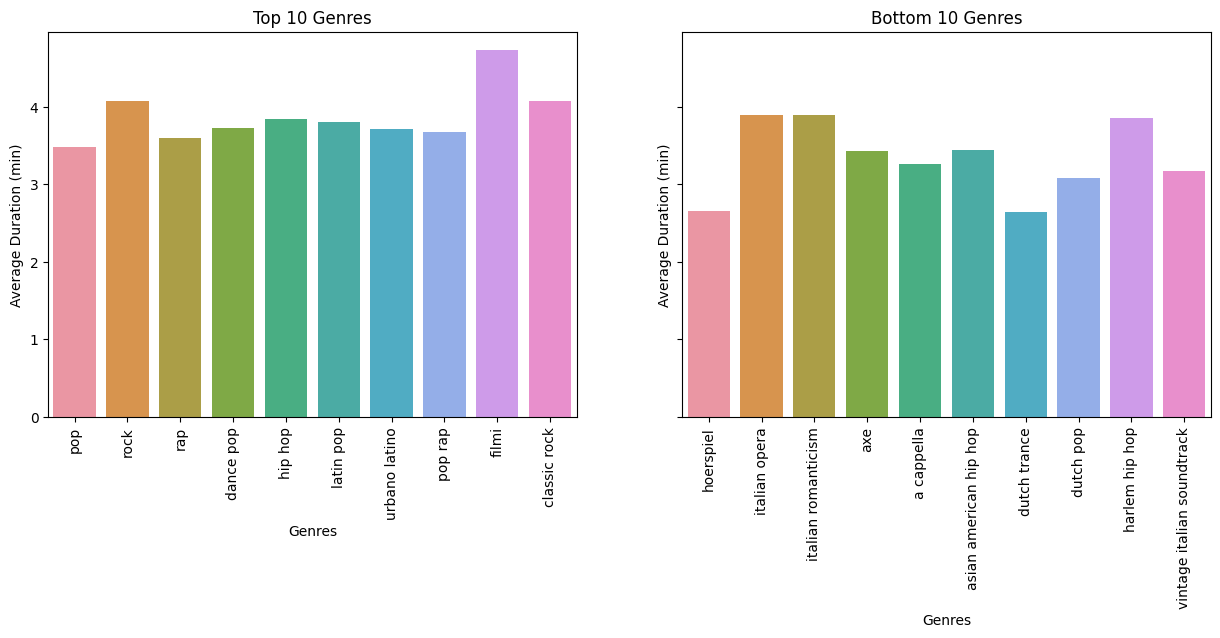

In [ ]:
genres_grouped = genre.groupby(by=['Genres']).agg({'Track Popularity': 'mean', 'count': 'mean', 'weight': 'mean', 'weight_normalized': 'mean', 'Duration_min': 'mean'}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.barplot(x = 'Genres', y = 'Duration_min', data = genres_grouped.sort_values(by = 'weight_normalized', ascending = False).head(10), ax=axes[0])
sns.barplot(x = 'Genres', y = 'Duration_min', data = genres_grouped.sort_values(by = 'weight_normalized', ascending = True).head(10), ax=axes[1])

axes[0].set_title('Top 10 Genres')
axes[1].set_title('Bottom 10 Genres')
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)

axes[0].set_ylabel('Average Duration (min)')
axes[1].set_ylabel('Average Duration (min)')
plt.show()


**Arists**

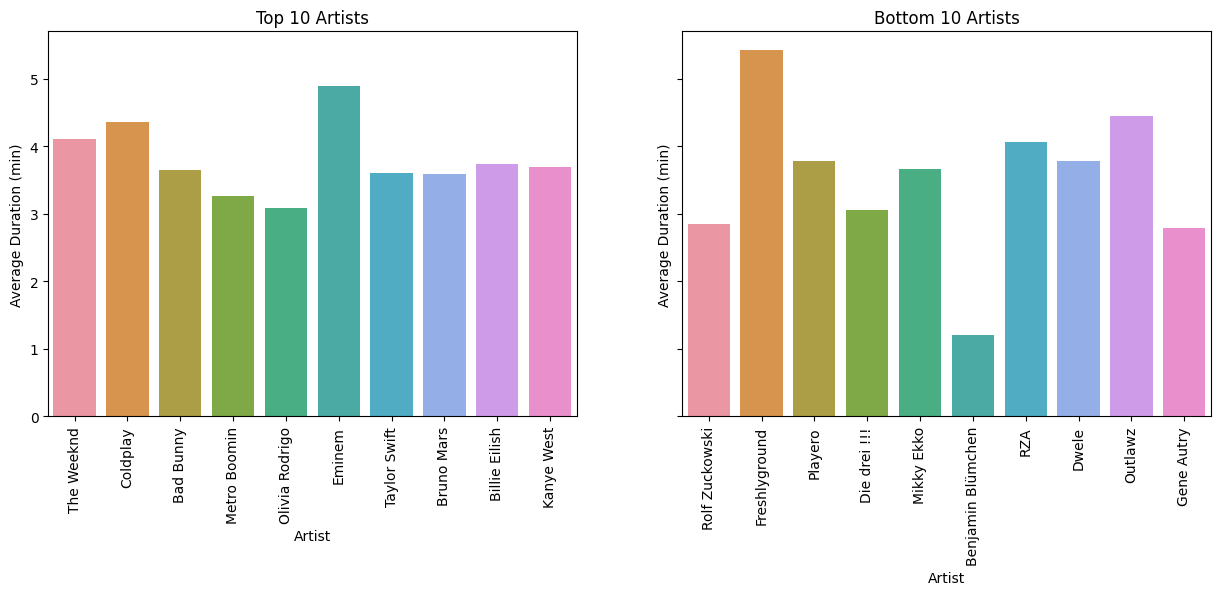

In [ ]:
artists_grouped = artist.groupby(by=['Artist']).agg({'Track Popularity': 'mean', 'count': 'mean', 'weight': 'mean', 'weight_normalized': 'mean', 'Duration_min': 'mean'}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.barplot(x = 'Artist', y = 'Duration_min', data = artists_grouped.sort_values(by = 'weight_normalized', ascending = False).head(10), ax=axes[0])
sns.barplot(x = 'Artist', y = 'Duration_min', data = artists_grouped.sort_values(by = 'weight_normalized', ascending = True).head(10), ax=axes[1])

axes[0].set_title('Top 10 Artists')
axes[1].set_title('Bottom 10 Artists')
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)

axes[0].set_ylabel('Average Duration (min)')
axes[1].set_ylabel('Average Duration (min)')
plt.show()


The findings here are pretty interesting. We can see that there is a smaller variance for the more popular artists and genres and they fall mostly in a 3-4 minute window. The unpopular genres and artists have a much higher variance; songs are either “too long” or “too short”. The idea that popular genres and artists follow a duration standard makes sense, given most of the popular genres and artists are derived from pop.

## Clustering

During our data analysis, we encountered a significant challenge, which revolved around the fact that ``each song was associated with multiple genres``, and a considerable number of these genres were found to be redundant. To address this, we are pursuing a clustering approach, which will enable us to achieve the following objectives: <br>


* Segmentation of songs based on their audio characteristics and overall popularity.

* Profiling these clusters to identify the most popular and trending songs, which could be leveraged by ``Spotify for their top-of-funnel marketing advertisements``.

* Providing a valuable resource for new artists to explore these clusters, helping them ``discern emerging trends`` and choose genres to explore in their creative endeavors.




**Defining feature set and standardizing the data**


Scaling the data is important because features like 'Track Popularity' which ranges from 0 to 100 might dominate the analysis , with scaling we are making sure that all features are given equal weight

In [ ]:
#Define features to used for clustering

clustering_feature_list = ['Track Popularity','Danceability','Energy','Acousticness','Instrumentalness','Liveness','Valence']

clustering_dataframe = dataframe[clustering_feature_list]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_dataframe)

As we have a lot of audio features, We will be using PCA to reduce the number of dimensions which will lead to better K-means performance and better interepretability in terms of visualisation

In [ ]:
# 2. Dimensionality Reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca.fit(scaled_data)

# Calculate the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
print("The principal components explain ",round(explained_variance.sum()*100),"% of the data")

The principal components explain  51 % of the data


**Finding Optimal Number of clusters**

We will be using an 'Elbow plot' to decide the optimal number of clusters, we will be looking at 'within cluster sum of squares' which is a measure of spread within each cluster, As WCSS decreases and doesn't change much even if we increase the number of clusters we can easily find out the optimal number of clusters we can use

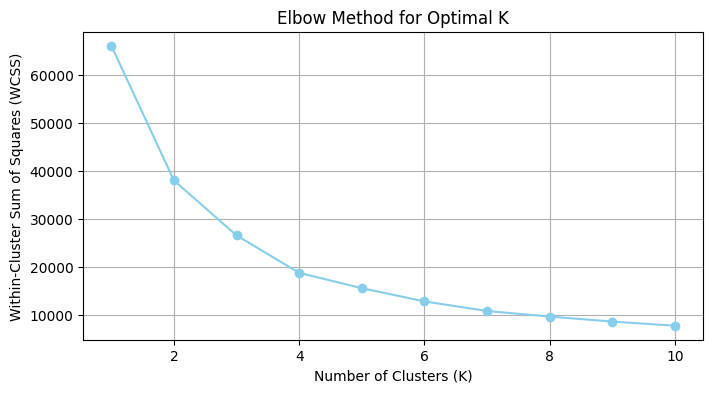

In [ ]:
wcss = []  # Within-cluster sum of squares
max_k = 10  # You can adjust the maximum value of K
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# 4. Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='-', color='skyblue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

Looking at the elbow plot, after K = 4 we see that the variability within each cluster doesn't change much but we don't see a clear elbow plot so we will do a Silhoutte analysis as well to make sure 4 is the optimal number of clusters.

**Silhoutte Analysis**

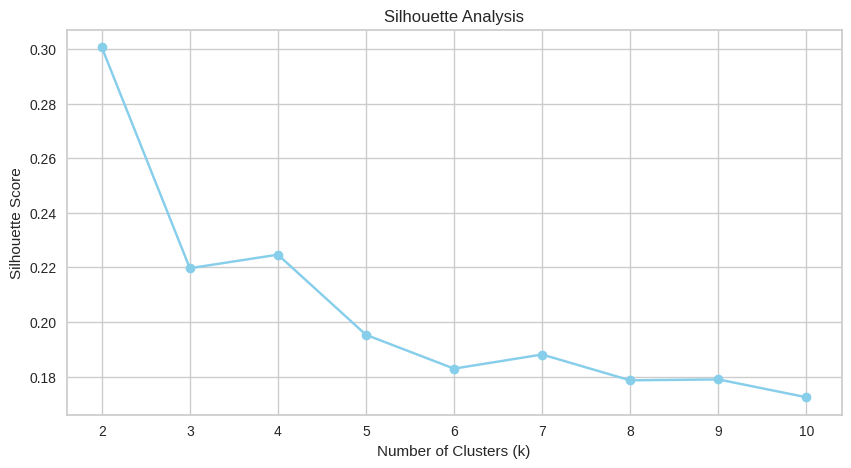

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()

**K means Clustering with 4 clusters**

<ipython-input-66-05f12cc6fe93>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



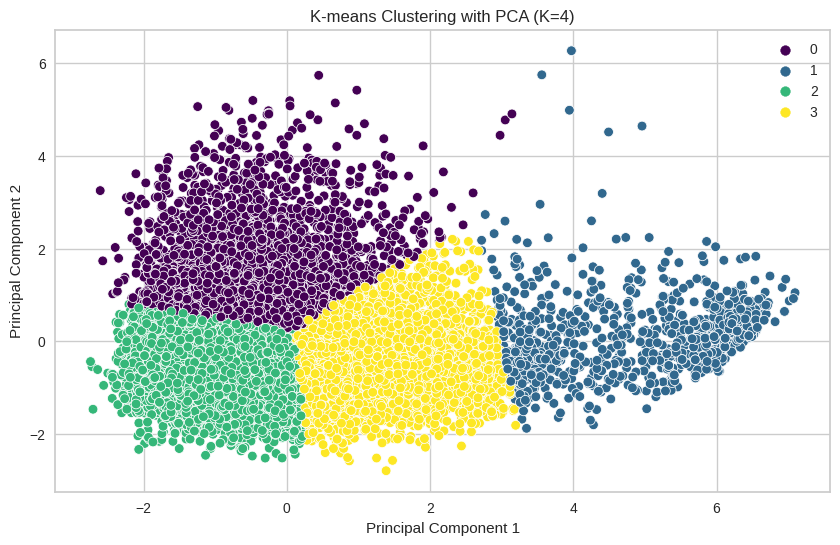

In [ ]:
# K-means Clustering with 4 clusters

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_result)

# Adding cluster labels to the original data

clustering_dataframe['Cluster'] = kmeans.labels_

#Visualizing the clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('K-means Clustering with PCA (K={})'.format(4))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

We were able to get 4 distinct clusters, however since we can't interpret what PC1 and PC2 we will profile these cluster to find meaningful differences

In [ ]:
# Profiling
df_cluster_summary = clustering_dataframe.groupby('Cluster').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})

# using mean of each variable to profile clusters

df_cluster_summary = df_cluster_summary[df_cluster_summary['metric'] == "mean"]
df_cluster_summary = df_cluster_summary.set_index('column')

df_cluster_summary.head(7)

Cluster,metric,0,1,2,3
column,,,,,
Track Popularity,mean,59.991375,57.486279,65.712598,63.293964
Danceability,mean,0.548840,0.317872,0.723163,0.560379
Energy,mean,0.782187,0.157565,0.705051,0.461501
Acousticness,mean,0.131869,0.874975,0.183274,0.508315
Instrumentalness,mean,0.032271,0.625015,0.008526,0.050125
Liveness,mean,0.361792,0.134800,0.137135,0.139741
Valence,mean,0.489948,0.154335,0.663758,0.386839


Looking at distribution of each variable for all clusters to see if there's any difference in distributions or not

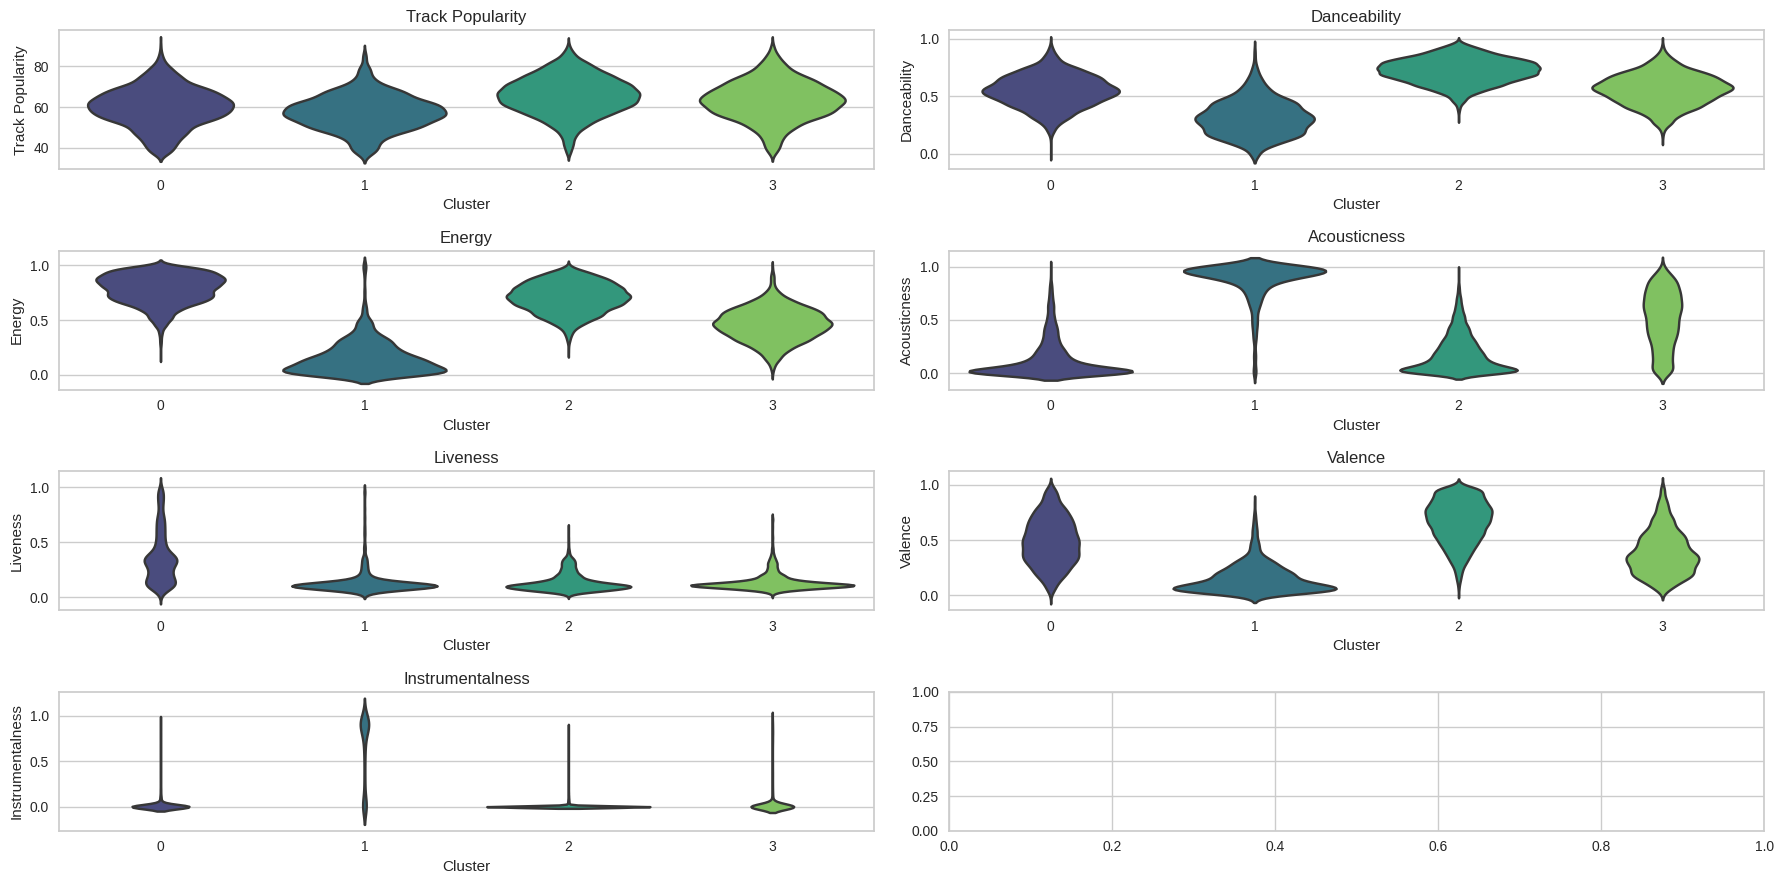

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(18, 9))

variables = ['Track Popularity', 'Danceability', 'Energy', 'Acousticness','Liveness','Valence','Instrumentalness']

for i, variable in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.violinplot(data=clustering_dataframe, x='Cluster', y=variable, inner=None,ax=ax[row, col], palette='viridis')
    ax[row, col].set_title(variable)
    ax[row, col].set_xlabel('Cluster')

plt.tight_layout()
plt.show()

Looking at the mean values for all features and the distributions, Our clustering algorith was able to distinguish between the songs quite well.

Cluster 0 : It consists of high energy and danceable songs <br>

Cluster 1 : It consists of songs with high acousticness and low valence so it has songs with a 'sad' vibe <br>

Cluster 2 : It has the highest mean track popularity and consists of highly danceable songs with high energy <br>

Cluster 3 : This cluster also has high popularity and an even mix of audio features, it may consist of mainstream songs <br>


## **Conclusion**

Our objective was to gain insights into the factors influencing the Track Popularity of songs. Initially, we held assumptions that individual audio features such as energy and danceability might play a role in track popularity. However, upon analyzing our correlation matrix, it became evident that these features did not have a significant impact. This prompted us to consider factors like an artist's fanbase (followers) or their level of YouTube engagement, but even in these cases, we could not establish a concrete relationship.

To delve deeper into our exploration, we conducted a comparison between top and bottom genres and artists. We examined which combination of audio features defined a genre and artist. Our findings revealed notable disparities between the top and bottom categories, suggesting that there isn't a single audio feature that singularly contributes to song popularity. Instead, it appears to be a combination of different audio features that influence a song's appeal.

With this information, we understood that genres and artists certainly have an effect on a track's popularity, but given the abudance of genres and artists on Spotify, this information alone can't create buisness value. We needed to find a way to generalize this concept, which led to clustering.

By using the features from the radar charts, coupled with track popularity, we were able to define 4 cluster with varying levels of features and track popularity. Since these are much more general, Spotify can utilize the cluster with the highest track popularity in top-funnel marketing tactics to acquire new users. Furthermore, the clusters are especially helpful for new artists on the platform that haven't found their sound. An artist can produce songs according to the feature weights of the most popular cluster to try and boost their reach on the app, at least until they find their own sound.

## **Challenges and Limitations**

The main challenge we faced in our dataset was its semi-structured nature. Since all of our information is coming from JSON objects, it was really difficult to work with columns such as ``Genres`` and ``Available Markets``. These columns were unique in the sense that when parsed, the information itself is actually an object, which we would then have to explode a subset of the data, and then groupby the column. Moreover, the abundance of unique ``Genres`` values made it super challenging to conduct meaningful analysis and derive insight. This is what ultimately led us to clustering, because a single genre is too specific to apply to a wide audience in terms of business application.

Another challenge that we faced was the way that Spotify calculates ``Track Popularity``. Given that it is a live metric, we weren't able to perform any timeseries analysis, and we had to shape our argument around the present. Although we are happy with the results of the project, this caveat certainly narrowed the scope of possibilities. It would be interesting in the future if someone were to periodically call the API over time to get different ``Track Popularity`` values for the same URIs, but this wasn't something we could perform with the given timeframe.

## Resources:
- Radar Charts: https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Scatterpolar.html

- Other Charts: https://python-graph-gallery.com/all-charts/

- Spotify API:  https://developer.spotify.com/documentation/web-api

- Pycountry: https://pypi.org/project/pycountry/

- Plotly Line Charts: https://plotly.com/python/line-charts/

- Plotly Choropleht Charts: https://support.spotify.com/us/article/where-spotify-is-available/